In [2]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# assumed loss function : MSE (Mean Squared Error)
# assuming the observed y value is "y_observed" and the predicted y value is "y_predicted"
# then loss function would be loss = ((y_observedi - y_predictedi)^2)* 1/N where N is the number of data points

# defining the parameters [These parameters are for training the model] 
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([5,7,9,11,13,15,17,19,21,23])

In [4]:
# these are parameters that we need to find out by following iterative approach
slope = 0
intercept = 0

# Hyperparamters [These are the parameters that we need to set before training the model]
learning_rate=0.01


# defining the number of iterations
epochs=1000

In [5]:

# defining the gradient descent algorithm
def gradient_descent(x,y,learning_rate,slope,intercept):
    
    # defining the partial derivative of the loss function with respect to slope
    dloss_dslope=0.0
    dloss_dintercept=0.0
    
    # defining the number of data points 
    N=x.shape[0]
    
    # defined loss function : loss=(yobserved - ypredicted)^2 ==> loss=(yobserved - (slope*x+intercept))^2
    
    # calculating the partial derivative of the loss function with repect to slope
    
    for xi,yi in zip(x,y):
        
        # calculating the gradients
        dloss_dslope+=-2*xi*(yi-(slope*xi+intercept))
        dloss_dintercept+=-2*(yi-(slope*xi+intercept))
        
    # updating the slope and intercept
    slope=slope-learning_rate*(dloss_dslope/N)
    intercept = intercept-learning_rate*(dloss_dintercept/N)
    
    return slope,intercept

In [14]:

slopes=[]
intercepts=[]
losses=[]
epochs_array=np.arange(epochs)
print(epochs_array)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [15]:
# iterating the number of epochs 
for epoch in range(epochs):
    # run gradient descent 
    slope,intercept = gradient_descent(x,y,learning_rate,slope,intercept)
    
    # predicting the y values
    y_predicted=slope*x + intercept # this would be for each x value in the array , so the y_Preicted would be an array
    
    # calculating the loss , calculating the sum of all values and dividing it with number of data points 
    loss=np.divide(np.sum((y-y_predicted)**2,axis=0),x.shape[0])
    
    # calculating the results for each epoch 
    print(f"{epoch} : slope : {slope} , intercept : {intercept} , loss : {loss}")
    
    
    slopes.append(slope)
    intercepts.append(intercept)
    losses.append(loss)

0 : slope : 2.005653371882638 , intercept : 2.9606422291670014 , loss : 0.00033197248531736744
1 : slope : 2.005629630324637 , intercept : 2.960807513676571 , loss : 0.0003291900769596983
2 : slope : 2.0056059884702435 , intercept : 2.9609721040673294 , loss : 0.00032643098919819406
3 : slope : 2.0055824459007496 , intercept : 2.961136003254256 , loss : 0.00032369502657257187
4 : slope : 2.0055590021992042 , intercept : 2.9612992141400887 , loss : 0.00032098199526089027
5 : slope : 2.005535656950407 , intercept : 2.9614617396153746 , loss : 0.0003182917030656473
6 : slope : 2.0055124097409025 , intercept : 2.961623582558522 , loss : 0.0003156239594002715
7 : slope : 2.00548926015897 , intercept : 2.9617847458358524 , loss : 0.00031297857527550876
8 : slope : 2.0054662077946195 , intercept : 2.9619452323016486 , loss : 0.00031035536328611203
9 : slope : 2.0054432522395813 , intercept : 2.9621050447982076 , loss : 0.00030775413759768323
10 : slope : 2.005420393087301 , intercept : 2.9622

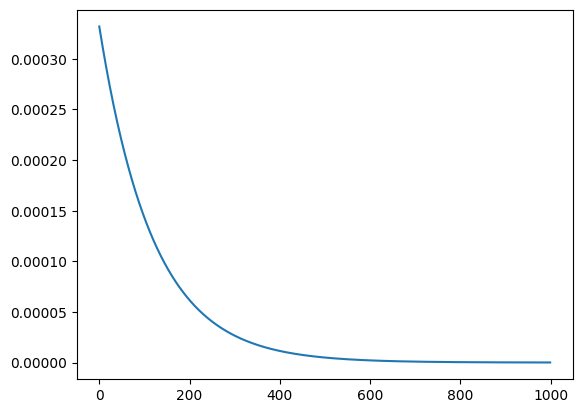

In [16]:
# plotting the loss function wrt to epochs 
plt.plot(epochs_array,losses)




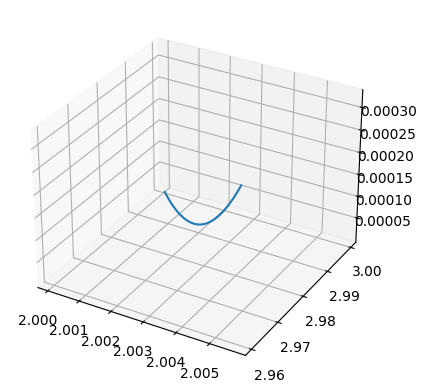

In [17]:
# plotting the loss wrt to slope and intercept
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(slopes,intercepts,losses)
plt.show()
